In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
os.environ["PUI2018"] = "%s/PUI2018"%os.getenv("HOME")
if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [33]:
datestring = '201701'
getCitiBikeCSV(datestring)

WARNING!!! something is wrong: the file is not there!


In [4]:
datestring = '201601'
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 


In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


# Idea:

### People are not very keen to follow up on their new years resolutions 

# Null Hypothesis

###  $H_{0}$ : Number of people riding bikes after January is same or more than that of January.

###  $H_{a}$ : Number of people riding bikes after January is less than that of January.


# Mathematical formulation of null hypothesis

###  $H_{0}$ : $Number of people_{riding bikes after January}$ >= $Number of people_{riding bikes in January}$

###  $H_{a}$ : $Number of people_{riding bikes after January}$ <  $Number of people_{riding bikes inJanuary}$

## significance level  $\alpha=0.05$


#### Here we will display plots by doing  a comparative analysis with the month of February

In [6]:
df_rendered = df[['tripduration','date']]
df_rendered['date'] = df_rendered['date'].dt.week

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
df_rendered.tail()

,tripduration,date
509473,1275,4
509474,1576,4
509475,356,4
509476,1128,4
509477,851,4


### Visualizing the weekwise ridership in the month of January

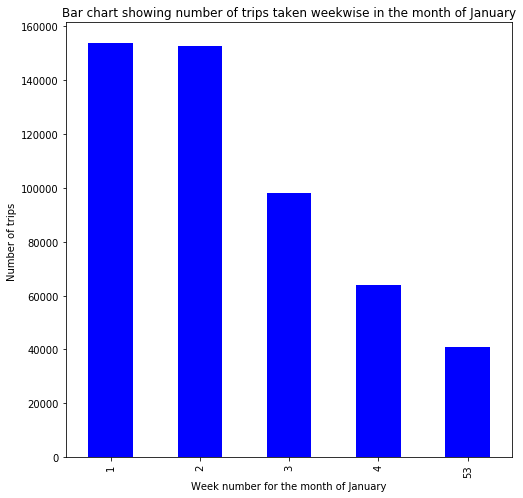

In [8]:
fig = pl.figure(figsize(8,8))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
ax = ((df_rendered['date'].groupby([df_rendered['date']]).count()) / norm_w).plot(kind="bar",color='b')
ax.set_xlabel('Week number for the month of January')
ax.set_ylabel('Number of trips ')
ax.set_title('Bar chart showing number of trips taken weekwise in the month of January')


# We do a weekwise comparision of ridership in the month of February

### Downloading data for the month of February

In [9]:

datestring = '201602'
getCitiBikeCSV(datestring)

file in place, you can continue


In [10]:
datestring = '201602'
df_feb = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')


In [11]:
df_feb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [12]:
df_feb['tripdate'] = pd.to_datetime(df_feb['starttime'], format='%m/%d/%Y %H:%M:%S')


In [13]:
df_feb_reduced = df_feb[['tripdate','tripduration']]
df_feb_reduced['week'] = df_feb_reduced['tripdate'].dt.week
df_feb_reduced['week'] = df_feb_reduced['week']
df_feb_reduced.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripdate,tripduration,week
0,2016-02-01 00:00:08,461,5
1,2016-02-01 00:00:56,297,5
2,2016-02-01 00:01:00,280,5
3,2016-02-01 00:01:00,662,5
4,2016-02-01 00:01:41,355,5


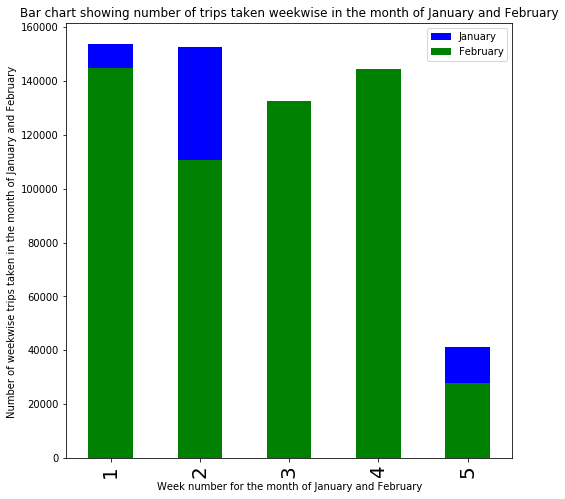

In [14]:
fig = pl.figure(figsize(8,8))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
ax = ((df_rendered['date'].groupby([df_rendered['date']]).count()) / norm_w).plot(kind="bar",color='b')
((df_feb_reduced['tripdate'].groupby([df_feb_reduced['tripdate'].dt.week]).count()) / norm_w).plot(kind="bar",color='g',ax=ax)
ax.set_xlabel('Week number for the month of January and February')
ax.set_ylabel('Number of weekwise trips taken in the month of January and February ')
ax.set_title('Bar chart showing number of trips taken weekwise in the month of January and February')
tmp = ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'], fontsize=20)
ax.legend(['January','February'])


## Interpretation
The number of trips taken in January appear to be **higher** than the number of trips taken in February overall

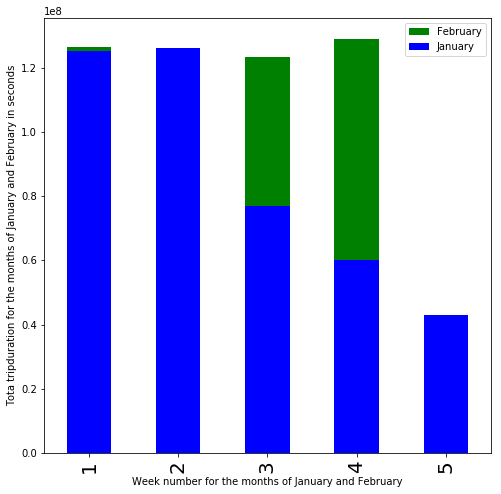

In [15]:
fig = pl.figure(figsize(8,8))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1

ax = ((df_feb_reduced['tripduration'].groupby([df_feb_reduced['tripdate'].dt.week]).sum()) / norm_w).plot(kind="bar",color='g')
((df_rendered['tripduration'].groupby([df_rendered['date']]).sum()) / norm_w).plot(kind="bar",color='b',ax=ax)
ax.set_xlabel('Week number for the months of January and February')
ax.set_ylabel('Tota tripduration for the months of January and February in seconds')

tmp = ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'], fontsize=20)
ax.legend(['February','January'])

## Interpretation
The sum of tripduration of all trips taken in January in seconds appears to be **lower** than the sum of tripduration of all trips taken in February overall

### Conclusion

An initial analysis by plots suggests that **more** trips were made in the month of **January** but **more** minutes were spent cycling in the month of **February**